Задача 1. Из начального приближения x = (-1,1) решить задачу безусловной минимизации функции 
f: R^2 -> R, f(x) = 2*x1^2 + x1*x2 + 3*x2^2 
градиентным методом, используя правило Армихо с параметрам alpha = 1, eps = t = 1/2

В результате работы программы выдать количество сделанных итераций, найденное решение и последовательность {xk} на каждой итерации. Сделать визуализацию решения задачи.

Для критериев остановки возьмем точность beta = 10^(-10)

 Шаг 0:
   x1=(-0.625,0.375)
 Шаг 1:
   x2=(-0.09375,-0.03125)
 Шаг 2:
   x3=(-0.04296875,0.00390625)
 Шаг 3:
   x4=(-0.02197265625,0.00634765625)
 Шаг 4:
   x5=(-0.0015869140625,0.0023193359375)
 Шаг 5:
   x6=(-0.0010833740234375,0.0007781982421875)
 Шаг 6:
   x7=(-0.0006389617919921875,0.0003299713134765625)
 Шаг 7:
   x8=(-8.249282836914062e-05,-5.245208740234375e-06)
 Шаг 8:
   x9=(-4.0590763092041016e-05,9.000301361083984e-06)
 Шаг 9:
   x10=(-2.250075340270996e-06,5.647540092468262e-06)
 Шаг 10:
   x11=(-1.8309801816940308e-06,1.69314444065094e-06)

По критерию остановки: |f(x^k+1) - f(x^k)| <= beta -> 8.089733743998906e-11 <= 10^(-10) решение найдено 
 Последний шаг: 10 
  Решение: x11=(-1.8309801816940308e-06,1.69314444065094e-06)


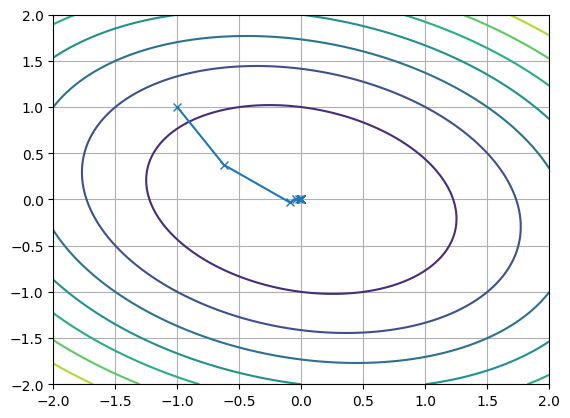

In [2]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

x1, x2 = sp.symbols("x1 x2")
f = 2*x1**2 + x1*x2 + 3*x2**2
f_sym = sp.lambdify((x1, x2), f)
df_sym = sp.lambdify((x1, x2), sp.derive_by_array(f, [x1, x2]))

alpha = 1
eps = 1/2
t = 1/2
x = np.array([[-1, 1]])
beta = 10**(-10)

alphas = np.array([])
for k in range(0,100):
    df = -df_sym(*x[k])
    alphas = np.append(alphas, alpha)
    while not(f_sym(*(x[k]+alphas[k]*df)) <= f_sym(*x[k]) + alphas[k]*eps*np.dot(-df, df)):
        alphas[k] = t*alphas[k]

    x = np.append(x, [x[k]-alphas[k]*(-df)], axis=0)
    
    print(f" Шаг {k}:\n   x_{k+1}=({x[k+1][0]},{x[k+1][1]})")
    
    if np.linalg.norm(x[k+1] - x[k]) <= beta:
        print(f"\nПо критерию остановки: ||x_k+1 - x_k|| <= beta -> {np.linalg.norm(x[k+1] - x[k])} <= 10^(-10)  решение найдено \n Последний шаг: {k} \n  Решение: x_{k+1}=({x[k+1][0]},{x[k+1][1]})")
        break
    if abs(f_sym(*x[k+1])-f_sym(*x[k])) <= beta:
        print(f"\nПо критерию остановки: |f(x_k+1) - f(x_k)| <= beta -> {abs(f_sym(*x[k+1])-f_sym(*x[k]))} <= 10^(-10) решение найдено \n Последний шаг: {k} \n  Решение: x_{k+1}=({x[k+1][0]},{x[k+1][1]})")
        break
    if np.linalg.norm(df_sym(*x[k+1])) <= beta:
        print(f"\nПо критерию остановки: ||f'(x_k)|| <= beta -> {np.linalg.norm(df_sym(*x[k+1]))} <= 10^(-10)  решение найдено \n Последний шаг: {k} \n  Решение: x_{k+1}=({x[k+1][0]},{x[k+1][1]})")
        break

if k==99:
    print(f"Остановка по количеству итераций: 100 \n Последнее решение: x_{k+1} = ({x[k+1][0]},{x[k+1][1]})")

# Рисуем
space = np.linspace(-2, 2, 1000)
x1, x2 = np.meshgrid(space, space)

plt.contour(x1, x2, f_sym(x1, x2))
plt.plot(x.T[0], x.T[1], marker='x')
plt.grid()